Exercise 01

190639B- Udayatha B.D.S

Question 1

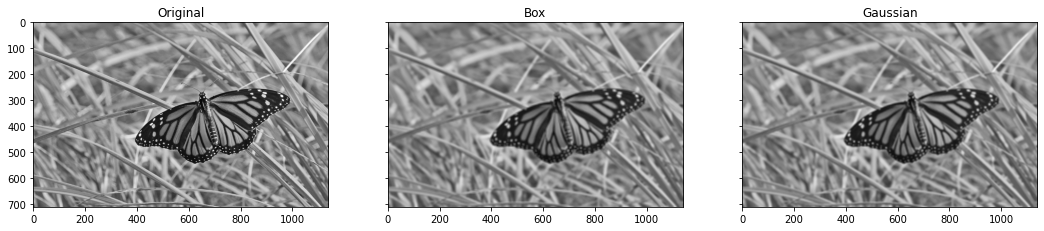

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
img = cv.imread('butterfly.jpg', cv.IMREAD_GRAYSCALE)

# Box filter
box_kernal= 1./81.*np.ones((9,9))
imgb = cv.filter2D(img,-1,box_kernal)

k_size=9
sigma=4
# Gausian filter
imgg=cv.GaussianBlur(img,(k_size,k_size),sigma)

fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray',vmin=0,vmax=255)
axes[0].set_title('Original')
axes[1].imshow(imgb, cmap='gray',vmin=0,vmax=255)
axes[1].set_title('Box')
axes[2].imshow(imgg, cmap='gray',vmin=0,vmax=255)
axes[2].set_title('Gaussian')
plt.show()

Question 2

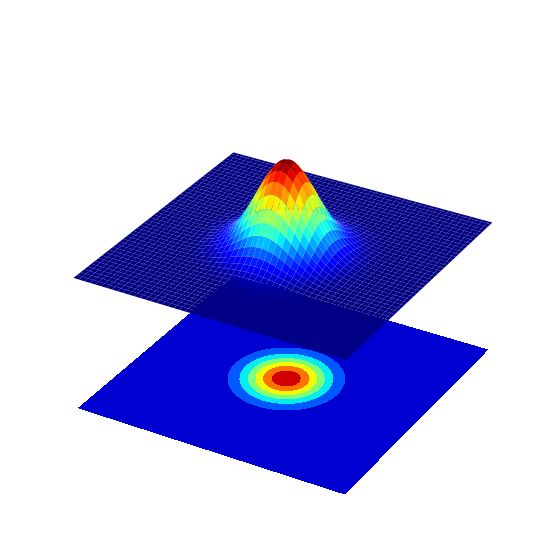

In [11]:
from mpl_toolkits.mplot3d import Axes3D
x=np.arange(-5,5+0.01,0.01)
y=np.arange(-5,5+0.01,0.01)
X,Y=np.meshgrid(x,y)
sigma=1
z=np.exp(-(X**2+Y**2)/(2*sigma**2))
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot( 111,projection='3d')

ax.plot_surface(X, Y, z,cmap=plt.cm.jet)
ax.contourf(X,Y,z,zdir='z',offset=np.min(z)-1.5,cmap=plt.cm.jet)
ax.set_zlim(np.min(z)-1.5,np.max(z))
ax.axis('off') 
plt.show() 


Question 3

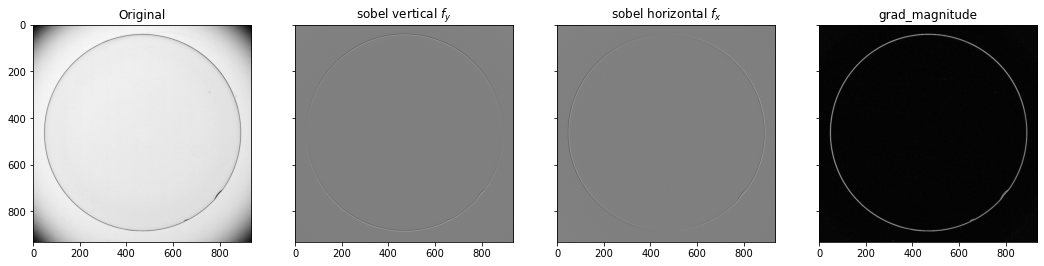

In [3]:
cont_lens_img=cv.imread('contact_lens.tif',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert cont_lens_img is not None

sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
im_x=cv.filter2D(cont_lens_img,-1,sobel_v)

sobel_h=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
im_y=cv.filter2D(cont_lens_img,-1,sobel_h)

grad_magnitude=np.sqrt(im_x**2+im_y**2)

fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,6))

axes[0].imshow(cont_lens_img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(im_x, cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('sobel vertical $f_y$')
axes[2].imshow(im_y, cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_title('sobel horizontal $f_x$')
axes[3].imshow(grad_magnitude,cmap='gray')
axes[3].set_title('grad_magnitude')
plt.show()

Question 4


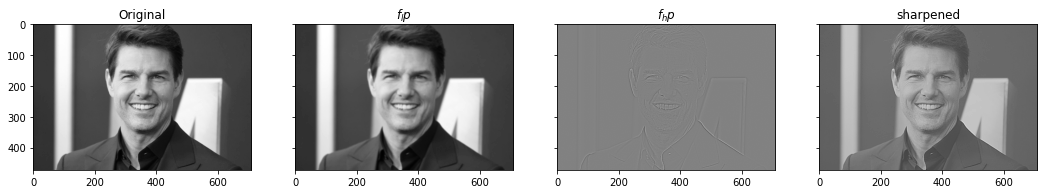

In [4]:
tom_img=cv.imread('tom.jpg',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert tom_img is not None

sigma=2
gaussian_1D=cv.getGaussianKernel(5,sigma)
f_lp=cv.sepFilter2D(tom_img,-1,gaussian_1D,gaussian_1D)
f_hp=tom_img-f_lp
f_sharpened=cv.addWeighted(tom_img,1.0,f_hp,2.0,0)
fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,6))

axes[0].imshow(tom_img, cmap='gray')
axes[0].set_title('Original')

axes[1].imshow(f_lp, cmap='gray')
axes[1].set_title('$f_lp$')
axes[2].imshow(f_hp, cmap='gray')
axes[2].set_title('$f_hp$')
axes[3].imshow(f_sharpened,cmap='gray')
axes[3].set_title('sharpened')
plt.show()